# Example: Computing The Price of Zero Coupon United States Treasury Bills
Zero coupon United States Treasury Bills, sometimes called `T-bills` or just `Zeros,` are marketable fixed-income debt securities that pay an investor a defined amount, called the face or par value, at the bill’s termination.  The price of a zero-coupon Treasury bill $V_{B}$ with an effective (constant) interest rate of $\bar{r}$ and maturity of $T$-years at auction is the discounted face (par) value $V_{P}$ such that the net present value (NPV) of the bill is zero:
$$
\begin{equation}    
\text{NPV}(T,\bar{r}) = -V_{B} + \mathcal{D}_{nT,0}^{-1}(\bar{r})\cdot{V_{P}} = 0
\end{equation}
$$
or equivalently:
$$
\begin{equation}
    V_{B}(T, \bar{r}) = \mathcal{D}_{nT,0}^{-1}(\bar{r})\cdot{V_{P}}
\end{equation}
$$  
The quantity $T$ denotes the duration of the bill (in years),  $\bar{r}$ is the effective annualized interest rate, and $\mathcal{D}_{nT,0}(\bar{r})$ is the multistep discrete discount factor for the period $0\rightarrow{nT}$. Thus, a typical discrete discount factor takes the form:
$$
\mathcal{D}_{nT,0}(\bar{r}) = \left(1+\frac{\bar{r}}{n}\right)^{n\cdot{T}}
$$
For T-bills, there are (typically) two compounding events per year; thus, $n = 2$.

## Learning objectives
This example will familiarize students with computing the price of zero coupon United States Treasury Bills, or `T-bills.` 

* __Prerequisite__: Before we begin any calculations, we'll load a United States Treasury action dataset for `T-bills.`
* __Task 1__: First, we'll compute the price of `T-bills` and validate our simulated prices using Treasury auction data from `2022` and `2023`. 
* __Task 2__: Then, we'll show the price of treasury bills is inversely proportional to the interest rate of the `T-bill` by selecting a random `T-bill` from the dataset and simulating its auction price $V_{B}$ for different values of the effective annual interest, $\bar{r}$. Toward this, we will:
  * `Check`: First, we'll randomly select a `T-bill` and check that the nominal computed price is _similar_ to the observed auction price $V_{B}$ (we'll demonstrate the use of the [@assert macro](https://docs.julialang.org/en/v1/base/base/#Base.@assert) and the [isapprox(...)](https://docs.julialang.org/en/v1/base/math/#Base.isapprox) function).
  * `TODO`: Then, we'll specify a range of $\bar{r}$-values to simulate using the [range function](https://docs.julialang.org/en/v1/base/math/#Base.range). 
  * `TODO`: Finally, we compute the `T-bill` price for different values of $\bar{r}$ and visualize the results by perturbing the nominal parameters of the randomly selected `T-bill.`
  * `Discussion question`: Is the slope of the interest rate versus the price line negative?

## Setup
Set up the computational environment by including the `Include.jl` file. The `Include.jl` file loads external packages, various functions we will use in the exercise, and custom types to model the components of our example problem.
* For additional information on functions and types used in this material, see the [Julia programming language documentation](https://docs.julialang.org/en/v1/) and the [VLQuantitativeFinancePackage.jl documentation](https://github.com/varnerlab/VLQuantitativeFinancePackage.jl). 

In [3]:
include("Include.jl");

##  Prerequisite: Load the Treasury Auction Dataset
We'll explore `T-bill` prices from United States Treasury auctions between April 2023 and January 2024 downloaded as a `CSV` file using the [Auction query functionality of TreasuryDirect.gov](https://www.treasurydirect.gov/auctions/auction-query/). We load the `CSV` dataset using a local `MyTreasuryBillDataSet()` function, which returns the auction data as [a `dataset::DataFrame` type](https://dataframes.juliadata.org/stable/). And then we get the number of records in the dataset.

In [5]:
dataset = MyTreasuryBillDataSet()

Row,CUSIP,Security Type,Security Term,Auction Date,Issue Date,Maturity Date,Price,Investment Rate
,String15,String7,String7,String15,String15,String15,Float64,Float64
1,912797GV3,Bill,4-Week,08/31/2023,09/05/2023,10/03/2023,99.5893,0.0539
2,912797HD2,Bill,8-Week,08/31/2023,09/05/2023,10/31/2023,99.1771,0.05423
3,912797HX8,Bill,17-Week,08/30/2023,09/05/2023,01/02/2024,98.2381,0.05516
4,912797FA0,Bill,42-Day,08/29/2023,08/31/2023,10/12/2023,99.3828,0.05412
5,912796ZD4,Bill,13-Week,08/28/2023,08/31/2023,11/30/2023,98.6502,0.05503
6,912797GP6,Bill,26-Week,08/28/2023,08/31/2023,02/29/2024,97.2953,0.0559
7,912797GU5,Bill,4-Week,08/24/2023,08/29/2023,09/26/2023,99.5889,0.05395
8,912797HC4,Bill,8-Week,08/24/2023,08/29/2023,10/24/2023,99.1771,0.05423
9,912797HW0,Bill,17-Week,08/23/2023,08/29/2023,12/26/2023,98.2431,0.055


Next, let's store the dimension (number of records) of our treasury auction dataset in the `number_of_bills::Int64` variable using [the `nrow(...)` function exported by the DataFrames.jl package](https://dataframes.juliadata.org/stable/lib/functions/#DataAPI.nrow)

In [7]:
number_of_bills = nrow(dataset);

## Task 1: Compute the Price of Zero-Coupon Treasury Bills at Auction
We compute the `T-bill` price by building a discounting model in this task. In this case, let's construct an instance of the [`DiscreteCompoundingModel` type](https://varnerlab.github.io/VLQuantitativeFinancePackage.jl/dev/fixed/#VLQuantitativeFinancePackage.DiscreteCompoundingModel) and store this discount model in the `discount_model` variable.
* The [`DiscreteCompoundingModel` type](https://varnerlab.github.io/VLQuantitativeFinancePackage.jl/dev/fixed/#VLQuantitativeFinancePackage.DiscreteCompoundingModel) has no data associated with it; instead, it is used [by the Julia multiple dispatch system](https://docs.julialang.org/en/v1/manual/methods/#Methods) so that we call the correct method version.

In [9]:
discount_model = DiscreteCompoundingModel();

Next, let's build a zero-coupon Treasury bill model, an instance of [the `MyUSTreasuryZeroCouponBondModel` type](https://varnerlab.github.io/VLQuantitativeFinancePackage.jl/dev/fixed/#VLQuantitativeFinancePackage.MyUSTreasuryZeroCouponBondModel) using [a custom `build(...)` method](https://varnerlab.github.io/VLQuantitativeFinancePackage.jl/dev/fixed/#VLQuantitativeFinancePackage.build-Tuple{Type{MyUSTreasuryZeroCouponBondModel},%20NamedTuple}). The [`build(...)` method](https://varnerlab.github.io/VLQuantitativeFinancePackage.jl/dev/fixed/#VLQuantitativeFinancePackage.build-Tuple{Type{MyUSTreasuryZeroCouponBondModel},%20NamedTuple}) requires two arguments: the `par` value of the `T-bill` and the `n` argument, i.e., the number of compounding periods per year. Store the zero-coupon model in the `model::MyUSTreasuryZeroCouponBondModel` variable:

In [11]:
model = build(MyUSTreasuryZeroCouponBondModel, (
    par = 100.0, n = 2
));

In [12]:
model

MyUSTreasuryZeroCouponBondModel(100.0, nothing, nothing, nothing, 2, nothing, nothing)

The zero-coupon instance is missing some critical data, so let's manually add this to the `model` instance and then compute the price. We'll select an example T-bill from the `dataset`: 

In [14]:
model.T = "26-Week"  |> securityterm; # parameters for T-bill #6
model.rate = 0.0559; # parameters for T-bill #6
model |> discount_model

MyUSTreasuryZeroCouponBondModel(100.0, 0.0559, 0.4986301369863014, 97.28834355615915, 2, Dict(0 => -97.28834355615915, 1 => 100.0), Dict(0 => 1.0, 1 => 1.027872367281858))

### TODO: Compute the price for all T-bills in the dataset
Finally, we compute the zero-coupon `T-bill` price for all the T-bills in `dataset` and compare the computed price to the price observed at auction. We process each record in the `dataset::DataFrame` using [a `for-loop`](https://docs.julialang.org/en/v1/base/base/#for). During each iteration of the loop:
* We get data from the `dataset::DataFrame` and update the `T-bill` model instance. In particular, we set the observed price to the variable `VB,` we set the duration `T` field (which we convert to the number of years using the local `securityterm` function) and the investment rate field, i.e., the annual interest rate on the `model::MyUSTreasuryZeroCouponBondModel` instance
* Next, we compute the price of the `T-bill` using the [Julia pipe `|>` operator](https://docs.julialang.org/en/v1/manual/functions/#Function-composition-and-piping) in combination with the discounting model [using a short-cut syntax](https://varnerlab.github.io/VLQuantitativeFinancePackage.jl/dev/fixed/#Short-cut-syntax).
* We then calculate the percentage error between the estimated and observed `T-bill` price and store the simulation data for each iteration in the `computed_price_table::DataFrame` using [the `push!(...)` function](https://dataframes.juliadata.org/stable/lib/functions/#Base.push!)

In [16]:
let 

    # blank model -
    model = build(MyUSTreasuryZeroCouponBondModel, (
        par = 100.0, n = 2
    ));
    
    computed_price_table = DataFrame();
    for i ∈ 1:number_of_bills
        
        VB = dataset[i, :Price];
        model.T = dataset[i, Symbol("Security Term")] |> String |> securityterm; # converts the duration in the data
        model.rate = dataset[i, Symbol("Investment Rate")];
            
        price_computed = model |> discount_model |> x-> x.price; # compute price assuming discrete discount
        absrtol = abs((VB - price_computed)/(price_computed)); # compute the abs of the relative tolerance 
        
        results_tuple = (
            CUSIP = dataset[i, :CUSIP],
            term = dataset[i, Symbol("Security Term")],
            rate = (dataset[i, Symbol("Investment Rate")] |> x-> 100*x),
            computed =  price_computed,
            actual = VB,
            rtol = absrtol
        );
        push!(computed_price_table, results_tuple)
    end
    computed_price_table
end

Row,CUSIP,term,rate,computed,actual,rtol
,String15,String7,Float64,Float64,Float64,Float64
1,912797GV3,4-Week,5.39,99.5928,99.5893,3.50655e-5
2,912797HD2,8-Week,5.423,99.1824,99.1771,5.35165e-5
3,912797HX8,17-Week,5.516,98.2416,98.2381,3.55206e-5
4,912797FA0,42-Day,5.412,99.3874,99.3828,4.60539e-5
5,912796ZD4,13-Week,5.503,98.6557,98.6502,5.58088e-5
6,912797GP6,26-Week,5.59,97.2883,97.2953,7.12772e-5
7,912797GU5,4-Week,5.395,99.5925,99.5889,3.52366e-5
8,912797HC4,8-Week,5.423,99.1824,99.1771,5.35165e-5
9,912797HW0,17-Week,5.5,98.2466,98.2431,3.5819e-5


## Task 2: Compute the T-bill price versus the interest rate
Malkiel proposed five theorems that govern the price of fixed-income debt securities, e.g., [Treasury Bills, Notes, and Bonds](https://www.treasurydirect.gov/marketable-securities/), as a function of the duration and yield values:
* [Malkiel, B. G. (1962). Expectations, Bond Prices, and the Term Structure of Interest Rates. The Quarterly Journal of Economics, 76(2), 197–218](https://www.jstor.org/stable/1880816)
The first of these theorems is that T-bill/note/bond prices are inversely proportional to the yield (the `investment rate` for `T-bills`):
> __Theorem 1__: Bond prices move inversely to bond yields.

Malkiel proved Theorem 1 analytically. Let's test this relationship computationally. First, select a random bill from the `dataset::DataFrame` by randomly selecting an index from `1...number_of_bills` using [the built-in Julia `rand(...)` function](https://docs.julialang.org/en/v1/stdlib/Random/#Base.rand). We'll use this `T-bill` as our example to test `Theorem 1.`

In [18]:
random_bill_index = rand(1:number_of_bills)
println("Selected bill: $(random_bill_index)")

Selected bill: 49


In [19]:
dataset[random_bill_index,:] # what is the auction data for this bill?

Row,CUSIP,Security Type,Security Term,Auction Date,Issue Date,Maturity Date,Price,Investment Rate
,String15,String7,String7,String15,String15,String15,Float64,Float64
49,912797GB7,Bill,52-Week,07/11/2023,07/13/2023,07/11/2024,94.813,0.05428


Create an instance of [the `MyUSTreasuryZeroCouponBondModel` model](https://varnerlab.github.io/VLQuantitativeFinancePackage.jl/dev/fixed/#VLQuantitativeFinancePackage.MyUSTreasuryZeroCouponBondModel) from the randomly selected nominal auction data using [the `build(...)` method](https://varnerlab.github.io/VLQuantitativeFinancePackage.jl/dev/fixed/#VLQuantitativeFinancePackage.build-Tuple{Type{MyUSTreasuryZeroCouponBondModel},%20NamedTuple}), assuming a par value of `100 USD` with two compounding periods per year. These values will be passed as arguments to the [`build(...)` method](https://varnerlab.github.io/VLQuantitativeFinancePackage.jl/dev/fixed/#VLQuantitativeFinancePackage.build-Tuple{Type{MyUSTreasuryZeroCouponBondModel},%20NamedTuple}) in the `par` and `n` parameters. Update the rest of the parameters on the `zero_coupon_model` instance from the `dataset.` The resulting zero-coupon model will be stored in the `model::MyUSTreasuryZeroCouponBondModel` variable.
* See the [DataFrames.jl documentation for examples of accessing data from a `DataFrame` instance](https://dataframes.juliadata.org/stable/man/basics/). 

In [21]:
zero_coupon_model = build(MyUSTreasuryZeroCouponBondModel, (
    par = 100.0, n = 2, 
    T = dataset[random_bill_index, Symbol("Security Term")] |> String |> securityterm,
    rate =  dataset[random_bill_index, Symbol("Investment Rate")]
)) |> discount_model;

#### Check: Is the computed price _similar_ to the auction price $V_{B}$?
The [isapprox function](https://docs.julialang.org/en/v1/base/math/#Base.isapprox) checks the equality of numerical values up to some tolerance value, where either relative `rol` or absolute tolerance `atol` can be specified. Let's use relative tolerance. 
* If two values are within `rtol` of each other, the [isapprox function](https://docs.julialang.org/en/v1/base/math/#Base.isapprox) returns `true`; otherwise, it returns `false`. When the [isapprox function](https://docs.julialang.org/en/v1/base/math/#Base.isapprox) is combined with the [@assert macro](https://docs.julialang.org/en/v1/base/base/#Base.@assert), a `false` result generates an [AssertionError](https://docs.julialang.org/en/v1/base/base/#Core.AssertionError).

In [23]:
VB = dataset[random_bill_index, :Price];
computed_price = zero_coupon_model.price
@assert isapprox(VB, computed_price; rtol=1e-4)

LoadError: AssertionError: isapprox(VB, computed_price; rtol = 0.0001)

#### Can we see the cash flow events?
The cashflow events are stored in the `cashflow::Dict{Int64, Float64}` field of the zero-coupon model:

In [25]:
zero_coupon_model.cashflow

Dict{Int64, Float64} with 2 entries:
  0 => -94.7991
  1 => 100.0

### TODO: Specify a range of perturbation values
To simulate the impact of changes in the interest rate, let's perturb the effective nominal interest rate $\bar{r}$, with all other values held constant, i.e., generate a new rate of the form $\bar{r}\leftarrow\beta\cdot\bar{r}$, where $\beta$ is a perturbation value; if $\beta<1$ the perturbed interest rate is _less than_ the nominal rate, if $\beta=1$ the perturbed interest rate is _equals_ the nominal rate, and if $\beta>1$ the perturbed interest rate is _greater than_ the nominal rate.

* First, we specify the number of perturbation values we want to consider; we store this value in the `number_of_samples` variable. If `number_of_samples` is odd, the perturbation range will include the nominal interest rate as the center value.
* Next, we specify the lower and upper values of the perturbation range; the lower bound is stored in the `β₁` variable, while the upper bound is stored in the `β₂` variable.
* Finally, we compute the perturbation array (stored in the `β`-variable) using the [range function](https://docs.julialang.org/en/v1/base/math/#Base.range) in combination with the [Julia pipe |> operator](https://docs.julialang.org/en/v1/manual/functions/#Function-composition-and-piping), and [the Julia collect function](https://docs.julialang.org/en/v1/base/collections/#Base.collect-Tuple{Type,%20Any}), which converts a range type to a collection, i.e., an array

In [27]:
number_of_samples = 7;
β₁ = 0.8;
β₂ = 1.2;
β = range(β₁, stop = β₂, length = number_of_samples) |> collect;

### TODO: Compute the change of the T-bill price as a function of the effective interest rate
Compute the price of the selected `T-bill` using different values for the effective interest rate and store the results in the `theorem_1_simulation_array` variable. Iterate through each value of the $\beta$ array using a `for` loop, where we use the [eachindex function](https://docs.julialang.org/en/v1/base/arrays/#Base.eachindex). For iteration $i$ of the loop:
* Get a value for the perturbation $\beta_{i}$ from the $\beta$-array, and compute the new effective interest rate $\bar{r}_{i} = \beta_{i}\cdot{\bar{r}}$.
* Update the `zero_coupon_model` instance with the new rate (set the `rate` field), and compute the new price
* Store the $\beta_{i}$ value in column 1 and the percentage difference in price in column 2 of the `theorem_1_simulation_array`
* Store the new value of the effective interest rate and the new price in columns 3 and 4, respectively. 

In [29]:
theorem_1_simulation_array = Array{Float64,2}(undef, number_of_samples, 4);
for i ∈ eachindex(β)
    
    β_value = β[i];
    r̄ = dataset[random_bill_index, Symbol("Investment Rate")];
    r̄_value = β_value*dataset[random_bill_index, Symbol("Investment Rate")];
    zero_coupon_model.rate = r̄_value;
    tmp = zero_coupon_model |> discount_model;
    new_price = tmp.price
    
    
    theorem_1_simulation_array[i,1] = β_value
    theorem_1_simulation_array[i,2] = ((new_price - computed_price)/(computed_price))*100
    theorem_1_simulation_array[i,3] = r̄_value
    theorem_1_simulation_array[i,4] = new_price
end
theorem_1_simulation_array;

### Visualize the perturbation $\beta$ versus the `%-change` in price
`Unhide` the code block below to see how we plotted the percentage change in the T-bill price versus the `β`-parameter (a surrogate for the effective interest rate). The case of `β = 1` denotes the nominal interest rate, $\beta<1$ denotes decreased interest rates compared to the nominal value, and $\beta>1$ denotes an increased interest rate.
* __Summary__: The price of the T-bill appears to be inversely proportional to the $\beta$-parameter, i.e., the effective interest rate of the instrument. Thus, we appear to confirm `Theorem 1` by simulation.

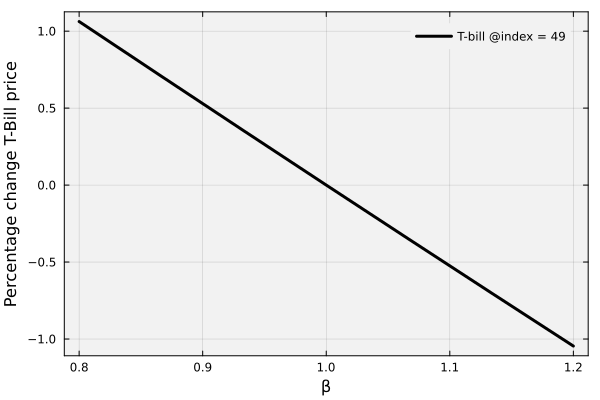

In [31]:
let
    q = plot(bg="gray95", background_color_outside="white", framestyle = :box, fg_legend = :transparent);
    plot(q, theorem_1_simulation_array[:,1], theorem_1_simulation_array[:,2], lw=3, c=:black, xlabel="β", 
            ylabel="Percentage change T-Bill price", label="T-bill @index = $(random_bill_index)")
end

### Discussion: Is the slope of the interest rate versus the price line negative?
If the relationship between the price and the yield is inversely proportional, then the slope of price versus $\bar{r}$ should be negative; let's check this condition by computing the slope from the simulation array, store this in the `slope` variable.
* Use the [@assert macro](https://docs.julialang.org/en/v1/base/base/#Base.@assert) to test of the slope is negative: if $\text{slope}>0$, i.e., `Theorem 1` is not supported, this test will throw an [AssertionError](https://docs.julialang.org/en/v1/base/base/#Core.AssertionError), otherwise the `Theorem 1` is supported by simulation

In [33]:
slope = (theorem_1_simulation_array[end,4] - theorem_1_simulation_array[1,4])/(theorem_1_simulation_array[end,3] - theorem_1_simulation_array[1,3]);
@assert (slope < 0.0)

## Disclaimer and Risks
__This content is offered solely for training and informational purposes__. No offer or solicitation to buy or sell securities or derivative products or any investment or trading advice or strategy is made, given, or endorsed by the teaching team. 

__Trading involves risk__. Carefully review your financial situation before investing in securities, futures contracts, options, or commodity interests. Past performance, whether actual or indicated by historical tests of strategies, is no guarantee of future performance or success. Trading is generally inappropriate for someone with limited resources, investment or trading experience, or a low-risk tolerance.  Only risk capital that is not required for living expenses.

__You are fully responsible for any investment or trading decisions you make__. Such decisions should be based solely on evaluating your financial circumstances, investment or trading objectives, risk tolerance, and liquidity needs.